### Gathering average CTR of articles

We want to analyse the behaviour of rewards of each article through time.
For this we plot average click-through-rate of articles over time. Average is taken over 4000 observations. Only observations where this article was displayed are considered. Timestamp is average of timestamps.

In [75]:
import os
os.chdir('../..')
os.getcwd()

'/Users/sbokupripeku/git/work/examples/costly_nonstationary_bandits'

In [370]:
%load_ext autoreload
%autoreload 2

from datetime import datetime, timedelta
from matplotlib import pyplot as plt

import dataset


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [350]:
files = [
#    "dataset/R6/short_data_20090501",
#     "dataset/R6/ydata-fp-td-clicks-v1_0.20090502",
#     "dataset/R6/ydata-fp-td-clicks-v1_0.20090503",
    "dataset/R6/short_data_1",
#     "dataset/R6/short_data_2"
]

In [336]:
def plot_article_ctrs(article_ctrs):
    fig, ax = plt.subplots(1,1, figsize=(20, 15));
    for art_id in article_ctrs.keys():
        ctrs, tss = article_ctrs[art_id]
        times = [datetime.fromtimestamp(ts) for ts in tss]
        ax.plot(times, ctrs, marker='o', label=art_id)
        
    ax.xaxis.set_major_locator(mdates.HourLocator(interval=3))

    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M | %b-%d'))
    
    plt.gcf().autofmt_xdate()
    ax.legend()
    plt.tight_layout()

### We need to combine data from all files

In [371]:
%%time
import time

files = [
    "dataset/R6/ydata-fp-td-clicks-v1_0.20090501",
    "dataset/R6/ydata-fp-td-clicks-v1_0.20090502",
    "dataset/R6/ydata-fp-td-clicks-v1_0.20090503",
    "dataset/R6/ydata-fp-td-clicks-v1_0.20090504",
    "dataset/R6/ydata-fp-td-clicks-v1_0.20090505",
    "dataset/R6/ydata-fp-td-clicks-v1_0.20090506",
    "dataset/R6/ydata-fp-td-clicks-v1_0.20090507",
    "dataset/R6/ydata-fp-td-clicks-v1_0.20090508",
    "dataset/R6/ydata-fp-td-clicks-v1_0.20090509",
    "dataset/R6/ydata-fp-td-clicks-v1_0.20090510",
]

file_ctrs = []

for file in files:
    begin = time.time()
    
    file_data = dataset.Dataset()
    file_data.fill_yahoo_events_first_version_r6a([file])
    
    fill_ts = time.time()
    fill_time = str(timedelta(seconds=fill_ts - begin))
    print(f'Reading events from file took {fill_time}')
    
    file_ctrs.append(
        file_data.gather_all_average_ctrs(average_over=4000)
    )
    
    gather_ctr_time = str(timedelta(seconds=time.time() - fill_time))
    print(f'Gathering ctr took {gather_ctr_time}')
    

1672145 events with 45 articles, from files  ['dataset/R6/ydata-fp-td-clicks-v1_0.20090501']
Skipped events: 3009847
Reading events from file took 0:01:13.902074
This took 0:01:27.450618
3679695 events with 42 articles, from files  ['dataset/R6/ydata-fp-td-clicks-v1_0.20090502']
Reading events from file took 0:02:20.971193
This took 0:03:51.557354
3966363 events with 39 articles, from files  ['dataset/R6/ydata-fp-td-clicks-v1_0.20090503']
Reading events from file took 0:02:31.930996
This took 0:04:12.373009
5432561 events with 47 articles, from files  ['dataset/R6/ydata-fp-td-clicks-v1_0.20090504']
Reading events from file took 0:03:41.118329
This took 0:06:29.180127
5377224 events with 47 articles, from files  ['dataset/R6/ydata-fp-td-clicks-v1_0.20090505']
Reading events from file took 0:03:44.094311
This took 0:06:29.913199
5367570 events with 51 articles, from files  ['dataset/R6/ydata-fp-td-clicks-v1_0.20090506']
Reading events from file took 0:03:53.936789
This took 0:06:54.76872

In [372]:
def combine_file_ctrs(file_ctrs):
    total_ctrs = {}
    for file_ctr in file_ctrs:
        for art_id in file_ctr.keys():
            ctrs, tss = file_ctr[art_id]
            if art_id in total_ctrs:
                article_ctr = total_ctrs[art_id]
            else:
                article_ctr = ([], [])
            article_ctr[0].extend(ctrs)
            article_ctr[1].extend(tss)
            total_ctrs[art_id] = article_ctr
    return total_ctrs

In [373]:
%%time
total_ctrs = combine_file_ctrs(file_ctrs)

CPU times: user 1.04 ms, sys: 3.76 ms, total: 4.81 ms
Wall time: 4.62 ms


In [374]:
import pickle
with open('dataset/R6/total_click_through_rates.pickle', 'wb') as f:
    pickle.dump(total_ctrs, f)

/var/folders/_g/d2bwsxss6v9_1830lrh6wyth0000gn/T/ipykernel_25081/1811954551.py:14: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


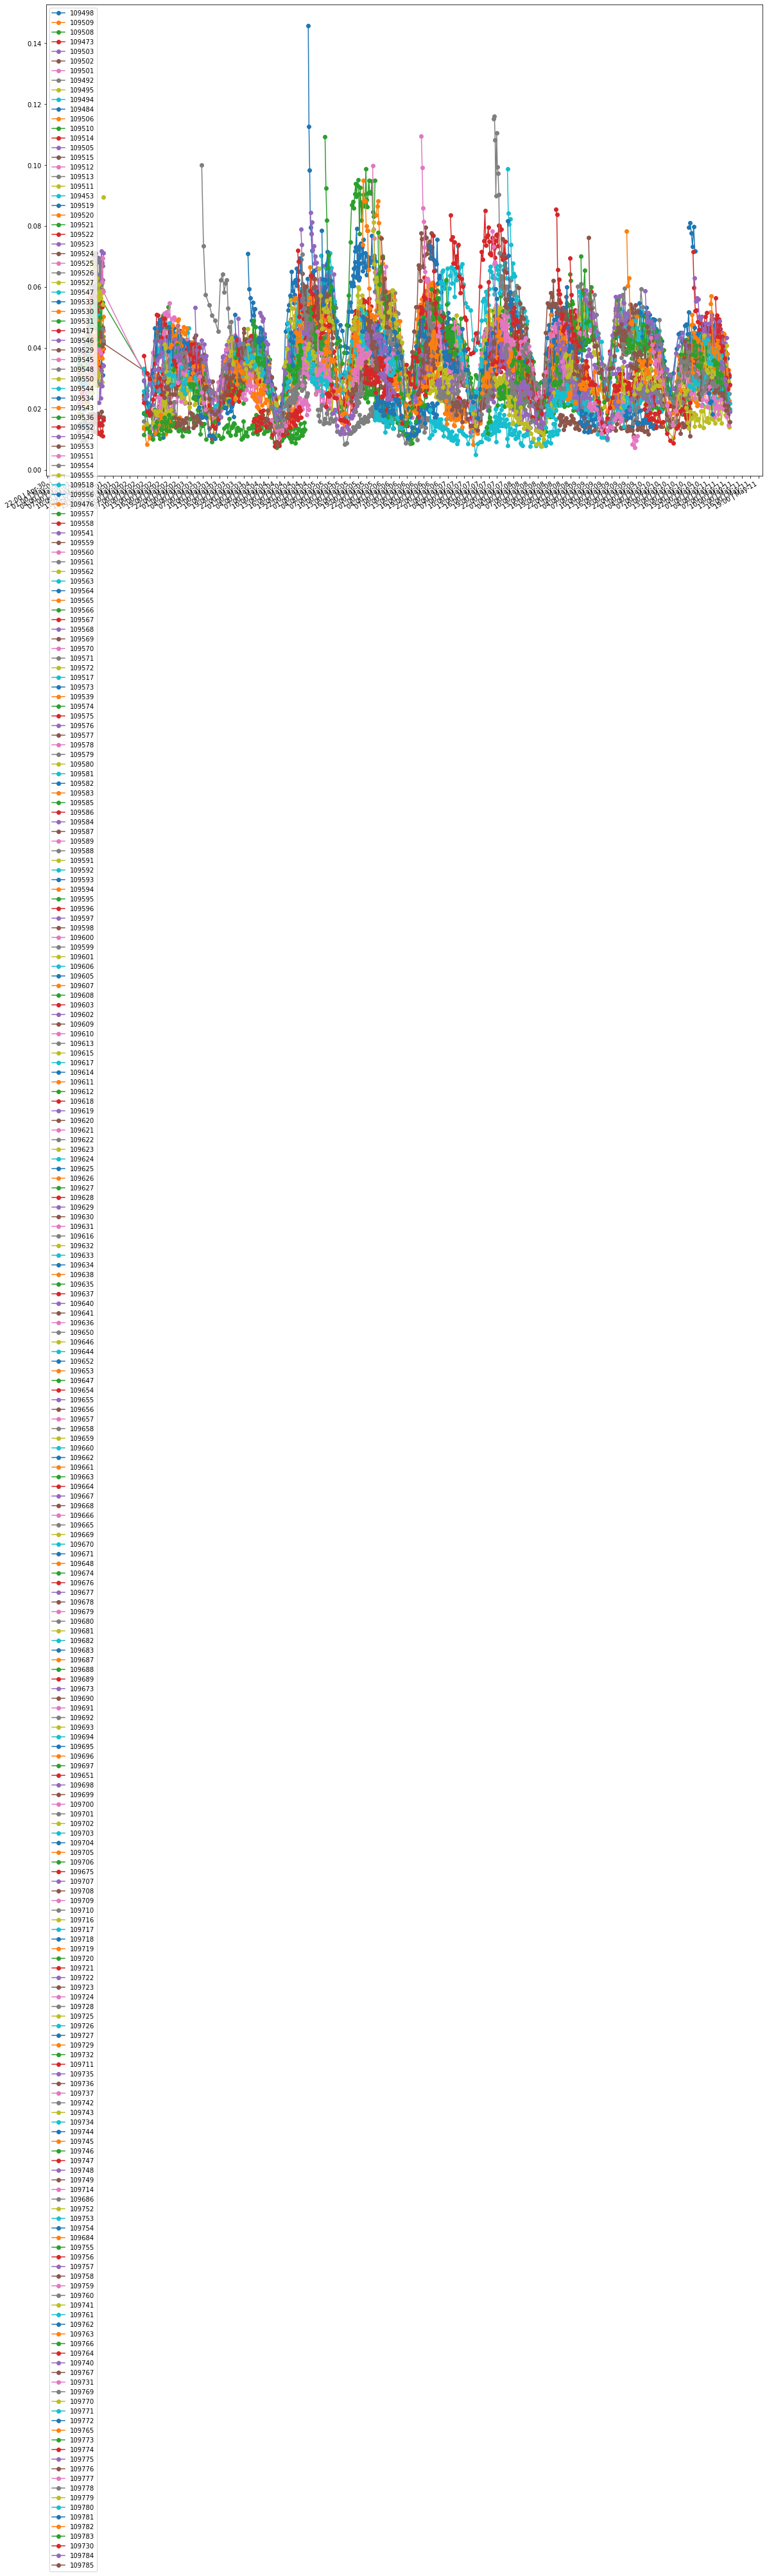

In [375]:
plot_article_ctrs(total_ctrs)